In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as mb
import lsst.sims.maf.db as db

In [3]:
opsdb = db.OpsimDatabase('db/kraken_2177.db')

In [4]:
m = metrics.CountMetric('observationStartMJD', metricName='NVisits')
s = slicers.HealpixSlicer(nside=64, lonCol='fieldRA', latCol='fieldDec', latLonDeg=True)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [5]:
sql = ''
bundle = mb.MetricBundle(metric=m, slicer=s, constraint=sql, runName='Kraken 2177', metadata='all visits')

In [6]:
bdict = mb.makeBundlesDictFromList([bundle])

In [7]:
outDir = 'test'
resultsDb = db.ResultsDb(outDir=outDir)
g = mb.MetricBundleGroup(bdict, opsdb, outDir=outDir, resultsDb=resultsDb)
g.runAll()

Querying database SummaryAllProps with no constraint for columns ['fieldRA', 'observationStartMJD', 'fieldDec'].
Found 2419918 visits
Running:  ['Kraken_2177_NVisits_all_visits_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [8]:
bundle.metricValues

masked_array(data = [-- -- -- ..., 180.0 180.0 360.0],
             mask = [ True  True  True ..., False False False],
       fill_value = -1.6375e+30)

In [9]:
import lsst.sims.maf.plots as plots

{'SkyMap': 1}

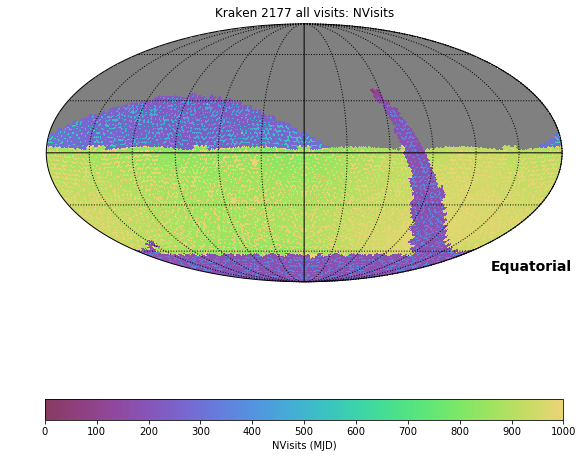

In [10]:
plotDict={'colorMin':0, 'colorMax': 1000, 'xMin':0, 'xMax':1000, 'figsize':(10,8)}
bundle.setPlotDict(plotDict)
bundle.plot(plotFunc=plots.HealpixSkyMap())

In [11]:
summaryMetrics = [metrics.MeanMetric(), metrics.RmsMetric()]
bundle.setSummaryMetrics(summaryMetrics)
bundle.computeSummaryStats()

In [12]:
bundle.summaryValues

{'Mean': 892.75208895744959, 'Rms': 1302.3498485771404}